In [2]:
import tensorflow as tf

## Download dataset

In [13]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

## Create model

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=[32, 32, 3]),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [12]:
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.4988 - accuracy: 0.4546 - val_loss: 1.2852 - val_accuracy: 0.5384
Epoch 2/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.1320 - accuracy: 0.5984 - val_loss: 1.0644 - val_accuracy: 0.6294
Epoch 3/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.9901 - accuracy: 0.6546 - val_loss: 0.9932 - val_accuracy: 0.6559
Epoch 4/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8971 - accuracy: 0.6849 - val_loss: 0.9255 - val_accuracy: 0.6823
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.8272 - accuracy: 0.7111 - val_loss: 0.9179 - val_accuracy: 0.6805
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7627 - accuracy: 0.7325 - val_loss: 0.8695 - val_accuracy: 0.7009
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 0.7135 - accuracy: 0.7483 - val_loss: 0.8515 - val_accuracy:

313/313 - 1s - loss: 0.8924 - accuracy: 0.7085


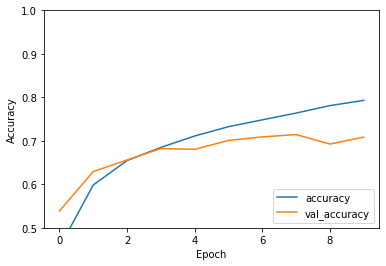

In [17]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)